In [43]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [44]:
sns.set(style="white")

color = '#1982C4'
color2 = '#FF595E'
color3 = '#8AC926'

In [45]:
# Read dataframe from csv file
file = "./data/processed_data/2023-06-07_data for analysis_v2.csv"
df = pd.read_csv(file)

In [46]:
df["Moneyness"] = df["Underlying_last"] / df["Strike"]

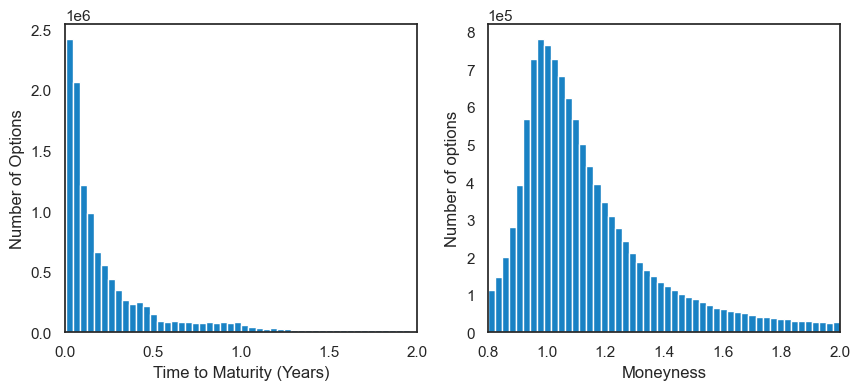

In [47]:
# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot distribution of Maturity
df["TTM"].plot(kind="hist", bins=50, ax=ax1, color=color)
ax1.set_xlabel("Time to Maturity (Years)")
ax1.set_ylabel("Number of Options")
ax1.set_xlim(0,2)

# Plot distribution of Moneyness
df["Moneyness"].plot(kind="hist", bins = 50, ax=ax2, color=color)
ax2.set_xlabel("Moneyness")
ax2.set_ylabel("Number of options")  # This removes the y-axis label from the second graph
ax2.set_xlim(0.8,2)

# Adjust the space between the subplots
#plt.subplots_adjust(wspace=0.2)  # 'wspace' stands for width space

# Force scientific notation on the y-axis of the right plot
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

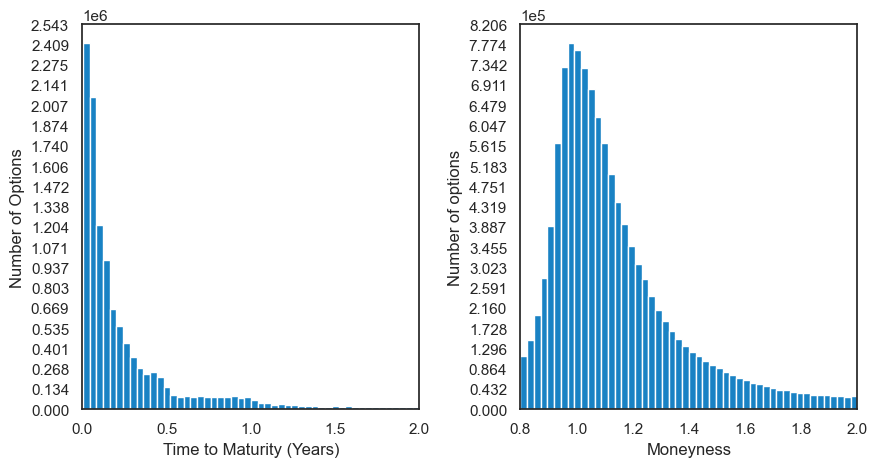

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot distribution of Maturity
df["TTM"].plot(kind="hist", bins=50, ax=ax1, color=color)
ax1.set_xlabel("Time to Maturity (Years)")
ax1.set_ylabel("Number of Options")
ax1.set_xlim(0,2)

y_ticks = np.linspace(0, ax1.get_ylim()[1], 20)  # replace 20 with desired number of ticks
ax1.set_yticks([round(y, 1) for y in y_ticks])  # round to 1 decimal place

# Plot distribution of Moneyness
df["Moneyness"].plot(kind="hist", bins = 50, ax=ax2, color=color)
ax2.set_xlabel("Moneyness")
ax2.set_ylabel("Number of options")
ax2.set_xlim(0.8,2)

y_ticks = np.linspace(0, ax2.get_ylim()[1], 20)  # replace 20 with desired number of ticks
ax2.set_yticks([round(y, 1) for y in y_ticks])  # round to 1 decimal place

# Adjust the space between the subplots
plt.subplots_adjust(wspace=0.3)  # 'wspace' stands for width space

# Force scientific notation on the y-axis of the right plot
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()


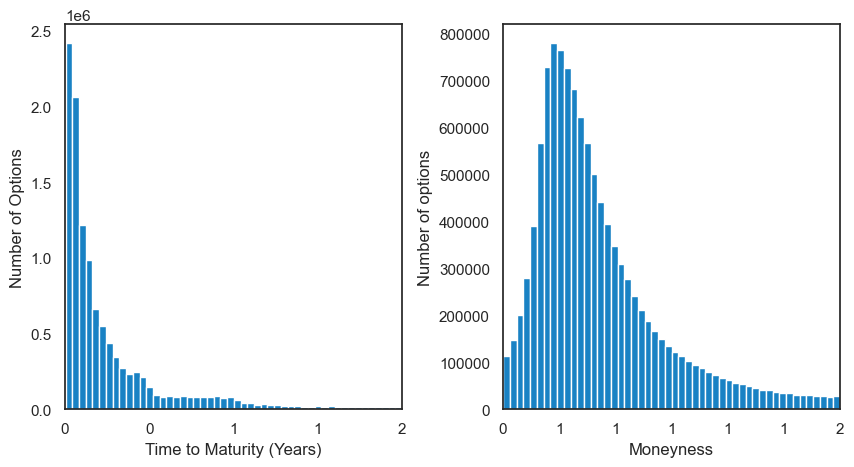

In [35]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Create function to format tick values
def format_ticks(x, pos):
    'The two args are the value and tick position'
    return '{}'.format(int(x))

formatter = ticker.FuncFormatter(format_ticks)

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot distribution of Maturity
df["TTM"].plot(kind="hist", bins=50, ax=ax1, color=color)
ax1.set_xlabel("Time to Maturity (Years)")
ax1.set_ylabel("Number of Options")
ax1.set_xlim(0,2)
ax1.xaxis.set_major_formatter(formatter)

# Plot distribution of Moneyness
df["Moneyness"].plot(kind="hist", bins = 50, ax=ax2, color=color)
ax2.set_xlabel("Moneyness")
ax2.set_ylabel("Number of options")
ax2.set_xlim(0.8,2)
ax2.xaxis.set_major_formatter(formatter)

# Adjust the space between the subplots
#plt.subplots_adjust(wspace=0.3)  # 'wspace' stands for width space

plt.show()

In [89]:
pd.options.display.float_format = '{:.2f}'.format
# Drop the 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)


# Extract the year from 'Quote_date' and create a new column 'Year'
df['Year'] = pd.to_datetime(df['Quote_date']).dt.year

# R to percent
df['R'] = df['R'] * 100

# Define years
years = list(range(2011, 2023))

# Initialize an empty DataFrame to store summary statistics
summary_stats = pd.DataFrame()

# Calculate summary statistics for each year
for year in years:
    mask = df['Year'] == year
    filtered_df = df[mask]
    
    stats = filtered_df.describe().loc[['count', 'mean', 'std']]
    stats.index = pd.MultiIndex.from_tuples([(year, idx) for idx in stats.index], names=['Year', 'Measure'])
    
    summary_stats = pd.concat([summary_stats, stats])

# Remove the 'Year' column from the summary statistics
summary_stats.drop(columns=['Year'], inplace=True)

# Reset the index and rename the columns
summary_stats = summary_stats.reset_index()

# Remove the index and rename 'Year (Measure)' column to 'Year'
summary_stats.index.name = None

# Set the display options to show the full DataFrame without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Create a custom function to display the year only in the first row of the year
def display_year_only_in_first_row(x):
    current_year = None
    formatted_rows = []

    for row in x.iterrows():
        year, measure = row[1]["Year"], row[1]["Measure"]
        if current_year != year:
            current_year = year
            formatted_rows.append((year, measure))
        else:
            formatted_rows.append(("", measure))

    return pd.DataFrame(formatted_rows, columns=["Year", "Measure"])

# Apply the custom function
summary_stats[["Year", "Measure"]] = display_year_only_in_first_row(summary_stats)

# Avoid scientific notation
summary_stats[["Underlying_last", "R", "TTM", "Moneyness", "Strike", "Price"]] = summary_stats[["Underlying_last", "R", "TTM", "Moneyness", "Strike", "Price"]].applymap(lambda x: f'{float(x):.2f}')
summary_stats.rename(columns={"Underlying_last": "S&P 500", "R": "Rate", "TTM": "Maturity (Years)", "Moneyness": "Moneyness", "Strike": "Strike", "Price": "Option price"}, inplace=True)


# Format numeric columns to have exactly two decimal places
numeric_columns = summary_stats.columns[2:]

# Only numeric columns of the rows where 'Measure' == 'count' need to be converted to float
summary_stats.loc[summary_stats['Measure'] == 'count', numeric_columns] = summary_stats.loc[summary_stats['Measure'] == 'count', numeric_columns].astype(float)

# Apply the custom function to format numeric columns
summary_stats[numeric_columns] = summary_stats[numeric_columns].applymap(lambda x: f'{float(x):.2f}')

# Print the summary statistics as a LaTeX table and print every row
print(tabulate(summary_stats, tablefmt='latex', headers=summary_stats.columns, showindex=False))



\begin{tabular}{llrrrrrr}
\hline
 Year   & Measure   &     Option price &          S\&P 500 &           Strike &   Maturity (Years) &             Rate &        Moneyness \\
\hline
 2011   & count     &  33080           &  33080           &  33080           &    33080           &  33080           &  33080           \\
        & mean      &    192.32        &   1236.11        &   1098.89        &        0.32        &      0.03        &      1.18        \\
        & std       &    173.97        &     27.61        &    228.79        &        0.39        &      0.05        &      0.28        \\
 2012   & count     & 259343           & 259343           & 259343           &   259343           & 259343           & 259343           \\
        & mean      &    191.6         &   1383.49        &   1239.55        &        0.34        &      0.1         &      1.17        \\
        & std       &    187.5         &     45.79        &    245.32        &        0.42        &      0.05        &      0